<a href="https://colab.research.google.com/github/Hemanthbola/PDS_ASSIGNMENT-3/blob/main/Assignment3_16359606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

question a


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


Population mean Glucose: 120.89
Population max  Glucose: 199
Sample mean     Glucose: 116.64
Sample max      Glucose: 183


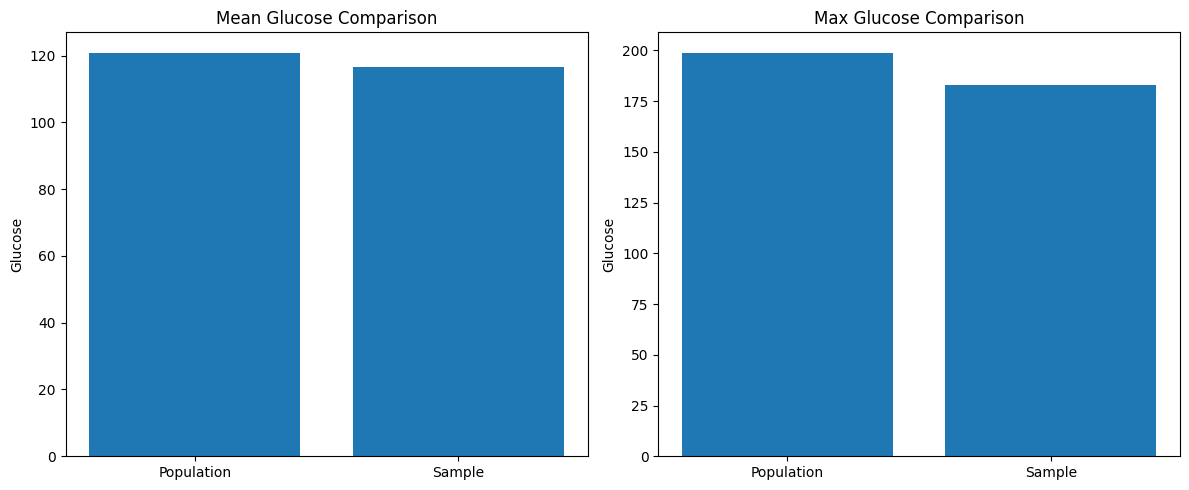

In [ ]:
# Import libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Load the data
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

#Population statistics
pop_mean = df['Glucose'].mean()
pop_max  = df['Glucose'].max()

#Set seed and draw a random sample of 25
np.random.seed(42)
sample_df = df.sample(n=25, random_state=42)

#Sample statistics
sample_mean = sample_df['Glucose'].mean()
sample_max  = sample_df['Glucose'].max()

#Print out the numbers
print(f"Population mean Glucose: {pop_mean:.2f}")
print(f"Population max  Glucose: {pop_max}")
print(f"Sample mean     Glucose: {sample_mean:.2f}")
print(f"Sample max      Glucose: {sample_max}")

#Plot comparison charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Mean comparison
axes[0].bar(['Population', 'Sample'], [pop_mean, sample_mean])
axes[0].set_title('Mean Glucose Comparison')
axes[0].set_ylabel('Glucose')

# Max comparison
axes[1].bar(['Population', 'Sample'], [pop_max, sample_max])
axes[1].set_title('Max Glucose Comparison')
axes[1].set_ylabel('Glucose')

plt.tight_layout()
plt.show()


question b


Population 98th percentile of BMI: 47.53
Sample     98th percentile of BMI: 40.25


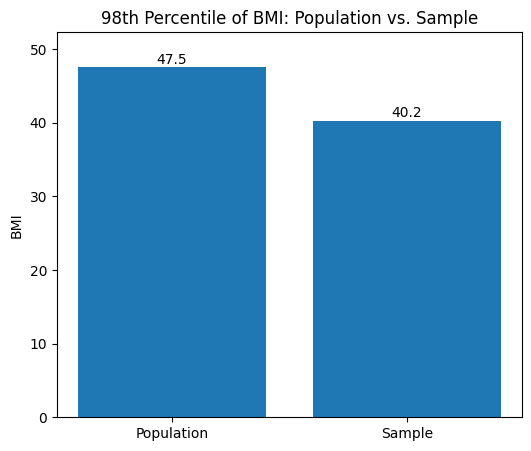

In [ ]:
# Population 98th percentile of BMI
pop_98 = df['BMI'].quantile(0.98)

# Draw the same reproducible sample of 25
np.random.seed(42)
sample_df = df.sample(n=25, random_state=42)

# Sample 98th percentile of BMI
sample_98 = sample_df['BMI'].quantile(0.98)

# Print the results
print(f"Population 98th percentile of BMI: {pop_98:.2f}")
print(f"Sample     98th percentile of BMI: {sample_98:.2f}")

# Plot comparison
plt.figure(figsize=(6,5))
plt.bar(['Population','Sample'], [pop_98, sample_98])
plt.title('98th Percentile of BMI: Population vs. Sample')
plt.ylabel('BMI')
plt.ylim(0, max(pop_98, sample_98) * 1.1)  # a little padding
for i, v in enumerate([pop_98, sample_98]):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center')
plt.show()

question c

Population BloodPressure mean:           69.11
Bootstrap avg. of sample means:         69.18

Population BloodPressure std dev:       19.36
Bootstrap avg. of sample std devs:      19.07

Population BloodPressure 98th percentile:99.32
Bootstrap avg. of sample 98th pctiles:  97.90


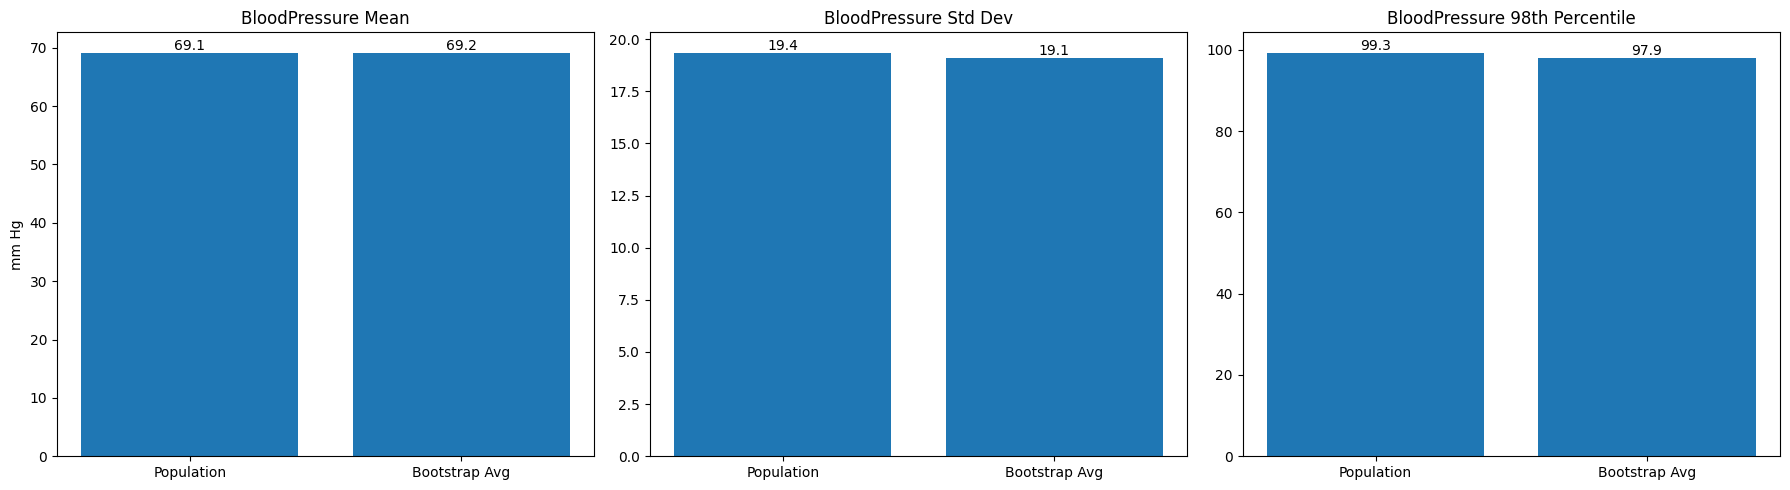

In [ ]:
# Population statistics for BloodPressure
pop_bp   = df['BloodPressure']
pop_mean = pop_bp.mean()
pop_std  = pop_bp.std()                # default ddof=1
pop_pct  = pop_bp.quantile(0.98)       # 98th percentile

# Bootstrap parameters
n_boot = 500
n_size = 150

# Draw bootstrap samples and collect stats
means = []
stds  = []
pcts  = []

np.random.seed(42)
for _ in range(n_boot):
    bs = pop_bp.sample(n=n_size, replace=True)
    means.append(bs.mean())
    stds.append(bs.std())
    pcts.append(bs.quantile(0.98))

# Compute average of bootstrap statistics
boot_mean = np.mean(means)
boot_std  = np.mean(stds)
boot_pct  = np.mean(pcts)

# Print out comparison
print(f"Population BloodPressure mean:           {pop_mean:.2f}")
print(f"Bootstrap avg. of sample means:         {boot_mean:.2f}\n")

print(f"Population BloodPressure std dev:       {pop_std:.2f}")
print(f"Bootstrap avg. of sample std devs:      {boot_std:.2f}\n")

print(f"Population BloodPressure 98th percentile:{pop_pct:.2f}")
print(f"Bootstrap avg. of sample 98th pctiles:  {boot_pct:.2f}")

# Plot side‐by‐side bar charts
fig, axes = plt.subplots(1, 3, figsize=(18,5))

labels = ['Population','Bootstrap Avg']

# Mean
axes[0].bar(labels, [pop_mean, boot_mean])
axes[0].set_title('BloodPressure Mean')
axes[0].set_ylabel('mm Hg')

# Std Dev
axes[1].bar(labels, [pop_std, boot_std])
axes[1].set_title('BloodPressure Std Dev')

# 98th Percentile
axes[2].bar(labels, [pop_pct, boot_pct])
axes[2].set_title('BloodPressure 98th Percentile')

# Annotate values
for ax in axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}",
                    (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom')
plt.tight_layout()
plt.show()
